In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Trained on masked data, tested on masked data
metrics_path_mm = '../runs/masked_train_masked_test/wf-outputs/wf-outputs-202503131718/metrics/metrics-polymask_train_mask_test.npy'
mask_train_mask_test = np.load(metrics_path_mm, allow_pickle=True)[()]

# Trained on masked data, tested on unmasked data
metrics_path_mu = '../runs/masked_train_unit_mask_test/wf-outputs/wf-outputs-202503131720/metrics/metrics-polymasked_train_unit_mask_test.npy'
mask_train_nomask_test = np.load(metrics_path_mu, allow_pickle=True)[()]

# Trained on unmasked data, tested on unmasked data
metrics_path_c = '../runs/control_train/wf-outputs/wf-outputs-202503131716/metrics/metrics-polycontrol_train.npy'
control_train = np.load(metrics_path_c, allow_pickle=True)[()]

# Trained and tested with unitary masks
metrics_path_u = '../runs/unit_masked_train/wf-outputs/wf-outputs-202503131721/metrics/metrics-polyunit_masked_train.npy'
unitary = np.load(metrics_path_u, allow_pickle=True)[()]

In [3]:
print(mask_train_mask_test.keys())
print(mask_train_mask_test['test_metrics'].keys())
print(mask_train_mask_test['test_metrics']['poly_metric'].keys())

dict_keys(['test_metrics', 'train_metrics'])
dict_keys(['poly_metric', 'mono_metric', 'opd_metric', 'shape_results_dict'])
dict_keys(['rmse', 'rel_rmse', 'std_rmse', 'std_rel_rmse'])


In [16]:
mask_test_mask_test_rel_rmse = mask_train_mask_test['test_metrics']['poly_metric']['rel_rmse']
mask_test_mask_test_std_rel_rmse = mask_train_mask_test['test_metrics']['poly_metric']['std_rel_rmse']

mask_test_nomask_test_rel_rmse = mask_train_nomask_test['test_metrics']['poly_metric']['rel_rmse']
mask_test_nomask_test_std_rel_rmse = mask_train_nomask_test['test_metrics']['poly_metric']['std_rel_rmse']

control_test_rel_rmse = control_train['test_metrics']['poly_metric']['rel_rmse']
control_test_std_rel_rmse = control_train['test_metrics']['poly_metric']['std_rel_rmse']

unitary_test_rel_rmse = unitary['test_metrics']['poly_metric']['rel_rmse']
unitary_test_std_rel_rmse = unitary['test_metrics']['poly_metric']['std_rel_rmse']

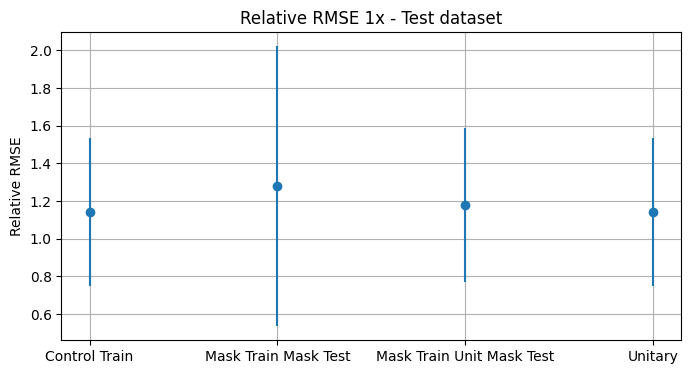

In [17]:
# Plot the results
fig, ax = plt.subplots(figsize=(8, 4))
plt.title('Relative RMSE 1x - Test dataset')
ax.errorbar([0, 1, 2, 3], [control_test_rel_rmse, mask_test_mask_test_rel_rmse, mask_test_nomask_test_rel_rmse, unitary_test_rel_rmse], yerr=[control_test_std_rel_rmse, mask_test_mask_test_std_rel_rmse, mask_test_nomask_test_std_rel_rmse, unitary_test_std_rel_rmse], fmt='o')
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Control Train', 'Mask Train Mask Test', 'Mask Train Unit Mask Test', 'Unitary'])
ax.grid('minor')
ax.set_ylabel('Relative RMSE')
plt.show()

In [18]:
mask_train_mask_test_rel_rmse = mask_train_mask_test['train_metrics']['poly_metric']['rel_rmse']
mask_train_mask_test_std_rel_rmse = mask_train_mask_test['train_metrics']['poly_metric']['std_rel_rmse']

mask_train_nomask_test_rel_rmse = mask_train_nomask_test['train_metrics']['poly_metric']['rel_rmse']
mask_train_nomask_test_std_rel_rmse = mask_train_nomask_test['train_metrics']['poly_metric']['std_rel_rmse']

control_train_rel_rmse = control_train['train_metrics']['poly_metric']['rel_rmse']
control_train_std_rel_rmse = control_train['train_metrics']['poly_metric']['std_rel_rmse']

unitary_rel_rmse = unitary['train_metrics']['poly_metric']['rel_rmse']
unitary_std_rel_rmse = unitary['train_metrics']['poly_metric']['std_rel_rmse']

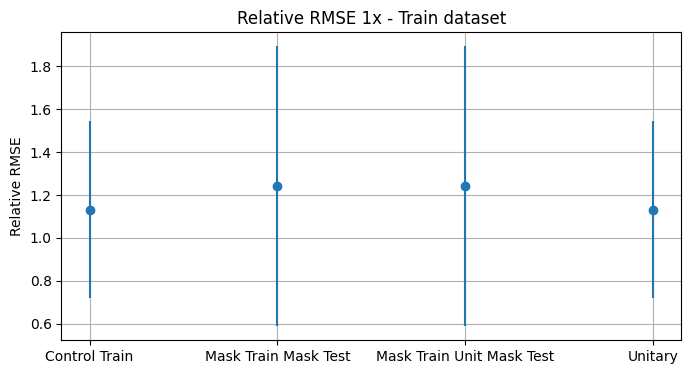

In [19]:
# Plot the results
fig, ax = plt.subplots(figsize=(8, 4))
plt.title('Relative RMSE 1x - Train dataset')
ax.errorbar([0, 1, 2, 3], [control_train_rel_rmse, mask_train_mask_test_rel_rmse, mask_train_nomask_test_rel_rmse, unitary_rel_rmse], yerr=[control_train_std_rel_rmse, mask_train_mask_test_std_rel_rmse, mask_train_nomask_test_std_rel_rmse, unitary_std_rel_rmse], fmt='o')
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Control Train', 'Mask Train Mask Test', 'Mask Train Unit Mask Test', 'Unitary'])
ax.set_ylabel('Relative RMSE')
ax.grid('minor')
plt.show()

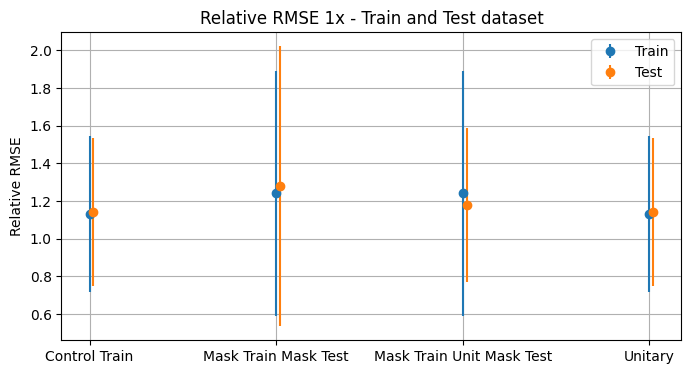

In [31]:
# Plot test and train relative RMSE in the same plot
fig, ax = plt.subplots(figsize=(8, 4))
plt.title('Relative RMSE 1x - Train and Test dataset')
ax.errorbar([0, 1, 2, 3], [control_train_rel_rmse, mask_train_mask_test_rel_rmse, mask_train_nomask_test_rel_rmse, unitary_rel_rmse], yerr=[control_train_std_rel_rmse, mask_train_mask_test_std_rel_rmse, mask_train_nomask_test_std_rel_rmse, unitary_std_rel_rmse], fmt='o', label='Train')
ax.errorbar([0.02, 1.02, 2.02, 3.02], [control_test_rel_rmse, mask_test_mask_test_rel_rmse, mask_test_nomask_test_rel_rmse, unitary_test_rel_rmse], yerr=[control_test_std_rel_rmse, mask_test_mask_test_std_rel_rmse, mask_test_nomask_test_std_rel_rmse, unitary_test_std_rel_rmse], fmt='o', label='Test')
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Control Train', 'Mask Train Mask Test', 'Mask Train Unit Mask Test', 'Unitary'])
ax.set_ylabel('Relative RMSE')
ax.grid('minor')
plt.legend()
# plt.show()
plt.savefig('masked_loss_validation.pdf')
